<a href="https://colab.research.google.com/github/LeandroCoelhos/flai_6/blob/main/6%20Compei%C3%A7%C3%A3o%20Modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold 

from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score

import missingno as missing
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
url1 = 'https://raw.githubusercontent.com/LeandroCoelhos/flai_6/main/data/TT.csv'
url2 = 'https://raw.githubusercontent.com/LeandroCoelhos/flai_6/main/data/teste_6.csv'

treino = pd.read_csv(url1)
teste = pd.read_csv(url2)

In [ ]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Escolaridade  2096 non-null   object
 1   Entrada       2096 non-null   int64 
 2   Cidade        2096 non-null   object
 3   Salário       2096 non-null   int64 
 4   Idade         2096 non-null   object
 5   Sexo          2096 non-null   object
 6   Projeto       2096 non-null   object
 7   Experiência   2096 non-null   int64 
 8   Saiu          2096 non-null   int64 
 9   Feedbacks     2096 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 163.9+ KB


In [ ]:
#verifica novamente os valores nulos
treino.isnull().sum()

Escolaridade    0
Entrada         0
Cidade          0
Salário         0
Idade           0
Sexo            0
Projeto         0
Experiência     0
Saiu            0
Feedbacks       0
dtype: int64

In [ ]:
treino['Saiu'].value_counts()

0    1388
1     708
Name: Saiu, dtype: int64

In [ ]:
# realiza o balanceamento das bases
zero  = treino[treino['Saiu']==0]   #zero values in outcome column
one = treino[treino['Saiu']==1]  # one values in outcome column
from sklearn.utils import resample
df_minority_zero = resample(zero, replace = True, n_samples = 1800) 
df_minority_one = resample(one, replace = True, n_samples = 1800) 

# concatena as variáveis "zero" e "one"
treino = pd.concat([df_minority_one, df_minority_zero])

# realiza um ordenamento aleatório das variáveis
from sklearn.utils import shuffle
treino = shuffle(treino)

In [ ]:
treino

,Escolaridade,Entrada,Cidade,Salário,Idade,Sexo,Projeto,Experiência,Saiu,Feedbacks
45,Doutorado,2016,Natal,3,25,Feminino,Não,3,0,1
809,Doutorado,2016,Natal,3,28,Masculino,Não,3,1,0
1989,Doutorado,2013,Natal,2,---,Feminino,Não,4,1,1
816,Doutorado,2017,João Pessoa,3,36,Feminino,Não,0,1,1
100,Doutorado,2013,Recife,1,37,Feminino,---,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1827,Doutorado,2017,Recife,2,---,Feminino,Não,2,1,0
1646,Doutorado,2012,Natal,3,26,Masculino,Não,4,1,1
959,Doutorado,2013,Recife,3,39,Masculino,Não,5,0,1
625,Doutorado,2016,Natal,3,24,Masculino,Não,2,0,0


In [ ]:
treino_media_idade = treino[treino['Idade'] != '---']['Idade'].median()
treino_media_idade = 23

In [ ]:
treino.Idade.replace('---', treino_media_idade, inplace=True)
treino.Idade = pd.to_numeric(treino.Idade)
teste.Idade.replace('---', treino_media_idade, inplace=True)
teste.Idade = pd.to_numeric(teste.Idade)

In [ ]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3600 entries, 45 to 1994
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Escolaridade  3600 non-null   object
 1   Entrada       3600 non-null   int64 
 2   Cidade        3600 non-null   object
 3   Salário       3600 non-null   int64 
 4   Idade         3600 non-null   int64 
 5   Sexo          3600 non-null   object
 6   Projeto       3600 non-null   object
 7   Experiência   3600 non-null   int64 
 8   Saiu          3600 non-null   int64 
 9   Feedbacks     3600 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 309.4+ KB


In [ ]:
treino = treino.drop(['Escolaridade'], axis=1) 
teste = teste.drop(['Escolaridade'], axis=1) 

In [ ]:
# realiza da dummificação das variáveis
treino = pd.get_dummies(treino, columns = ['Cidade', 'Entrada', 'Salário'], dtype=int)
teste = pd.get_dummies(teste, columns = ['Cidade', 'Entrada', 'Salário'], dtype=int)

In [ ]:
treino['Sexo'] = treino['Sexo'].map({'Masculino': 0, 'Feminino':1})
treino['Projeto'] = treino['Projeto'].map({'Não': 0, 'Sim':2, '---':1})
treino['Experiência'] = treino['Experiência'].map({0: 0 , 1: 1 , 2: 2 ,3: 3 ,4: 4, 5:5, 6:5, 7:5})

teste['Sexo'] = teste['Sexo'].map({'Masculino': 0, 'Feminino':1})
teste['Projeto'] = teste['Projeto'].map({'Não': 0, 'Sim':2, '---':1})
teste['Experiência'] = teste['Experiência'].map({0: 0 , 1: 1 , 2: 2 ,3: 3 ,4: 4, 5:5, 6:5, 7:5})

In [ ]:
treino['Idade'] = treino['Idade']/41
teste['Idade'] = teste['Idade']/41

treino['Feedbacks'] = treino['Feedbacks']/4
teste['Feedbacks'] = teste['Feedbacks']/4

treino['Experiência'] = treino['Experiência']/5
teste['Experiência'] = teste['Experiência']/5

In [ ]:
# confere os tipos das variáveis
print(treino.dtypes)

Idade                 float64
Sexo                    int64
Projeto                 int64
Experiência           float64
Saiu                    int64
Feedbacks             float64
Cidade_João Pessoa      int32
Cidade_Natal            int32
Cidade_Recife           int32
Entrada_2012            int32
Entrada_2013            int32
Entrada_2014            int32
Entrada_2015            int32
Entrada_2016            int32
Entrada_2017            int32
Entrada_2018            int32
Salário_1               int32
Salário_2               int32
Salário_3               int32
dtype: object


In [ ]:
treino

,Idade,Sexo,Projeto,Experiência,Saiu,Feedbacks,Cidade_João Pessoa,Cidade_Natal,Cidade_Recife,Entrada_2012,Entrada_2013,Entrada_2014,Entrada_2015,Entrada_2016,Entrada_2017,Entrada_2018,Salário_1,Salário_2,Salário_3
45,0.609756,1,0,0.6,0,0.25,0,1,0,0,0,0,0,1,0,0,0,0,1
809,0.682927,0,0,0.6,1,0.00,0,1,0,0,0,0,0,1,0,0,0,0,1
1989,0.560976,1,0,0.8,1,0.25,0,1,0,0,1,0,0,0,0,0,0,1,0
816,0.878049,1,0,0.0,1,0.25,1,0,0,0,0,0,0,0,1,0,0,0,1
100,0.902439,1,1,0.2,0,0.00,0,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,0.560976,1,0,0.4,1,0.00,0,0,1,0,0,0,0,0,1,0,0,1,0
1646,0.634146,0,0,0.8,1,0.25,0,1,0,1,0,0,0,0,0,0,0,0,1
959,0.951220,0,0,1.0,0,0.25,0,0,1,0,1,0,0,0,0,0,0,0,1
625,0.585366,0,0,0.4,0,0.00,0,1,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
treino['FatorSai'] = (treino['Salário_2'] + 2*treino['Entrada_2018'] + treino['Cidade_João Pessoa'] + treino['Sexo'])/5

teste['FatorSai'] = ( teste['Salário_2']  + 2*teste['Entrada_2018'] + teste['Cidade_João Pessoa'] + teste['Sexo'])/5

In [ ]:
#Separando em treino e Teste
xtreino = treino.drop(['Saiu'], axis=1)#, 'regiao_norte', 'regiao_sul', 'regiao_centro-oeste', 'regiao_nordeste', 'tempo'
ytreino = treino['Saiu'].to_list()
print(xtreino.shape)

(3600, 19)


In [ ]:
xteste = teste

In [ ]:
xteste

,Idade,Sexo,Projeto,Experiência,Feedbacks,Cidade_João Pessoa,Cidade_Natal,Cidade_Recife,Entrada_2012,Entrada_2013,Entrada_2014,Entrada_2015,Entrada_2016,Entrada_2017,Entrada_2018,Salário_1,Salário_2,Salário_3,FatorSai
0,0.634146,0,0,0.8,0.0,0,0,1,0,0,0,0,0,1,0,0,1,0,0.2
1,0.634146,1,0,0.8,0.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0.2
2,0.658537,0,0,1.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.0
3,0.634146,0,0,0.8,0.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0.0
4,0.560976,1,0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,0.634146,1,0,0.8,0.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.2
1733,0.560976,0,0,0.4,0.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0.4
1734,0.658537,0,0,1.0,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0.4
1735,0.731707,0,2,0.4,0.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0.0


In [ ]:
from catboost import CatBoostClassifier

#Correlação


<AxesSubplot:>

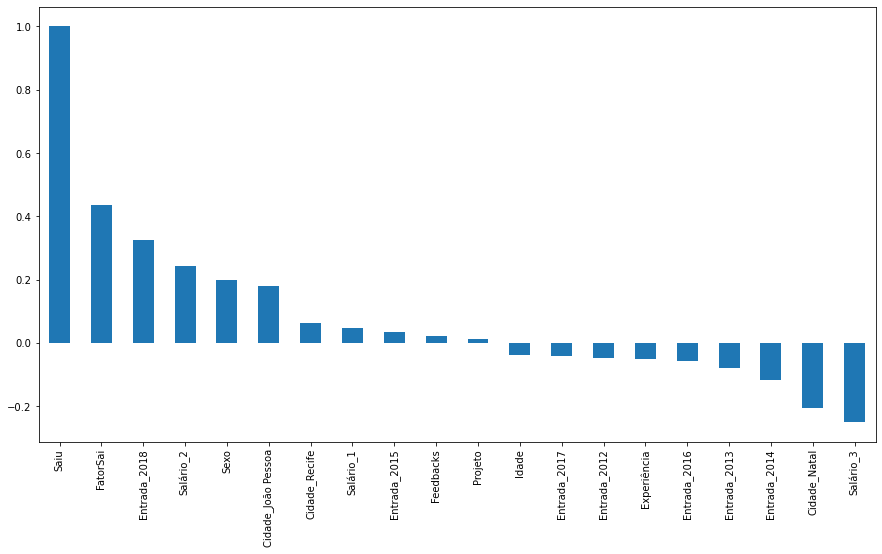

In [ ]:
plt.figure(figsize=(15,8))
treino.corr()['Saiu'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtreino, ytreino, test_size=0.25)
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)
pred = modelo.predict(X_test)
f1 = metrics.f1_score(y_test, pred)
print(f1)

0.8816964285714286


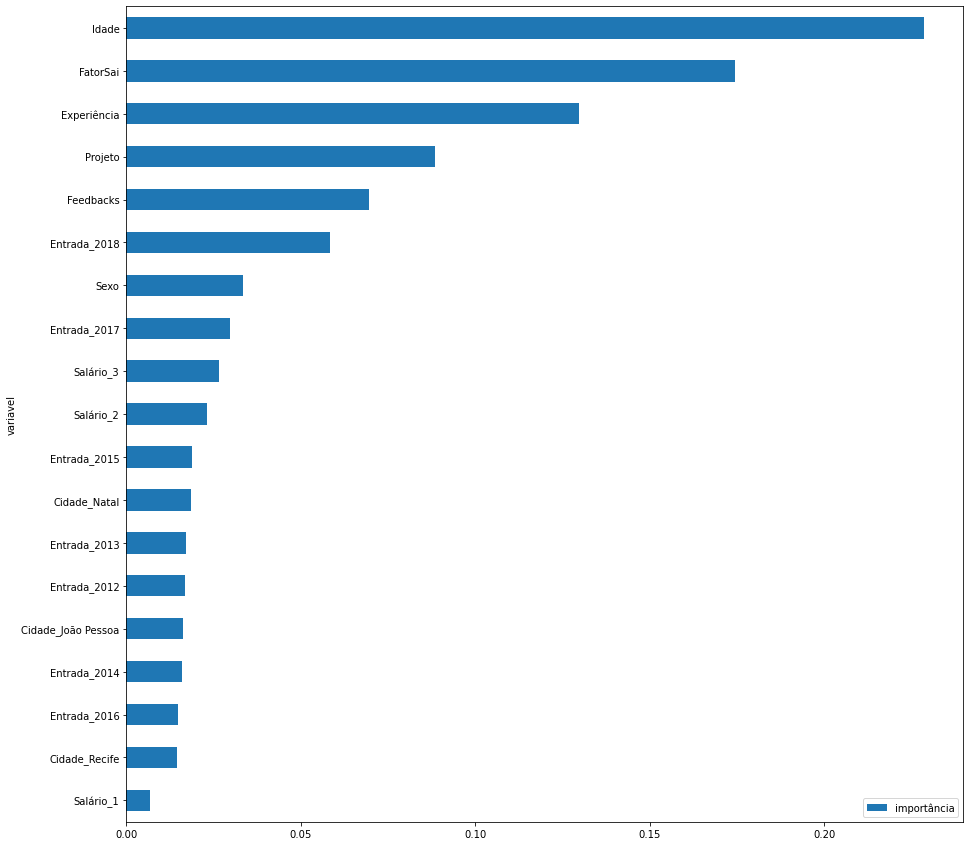

In [ ]:
modelo_base = RandomForestClassifier() 
modelo_base.fit(xtreino, ytreino) 
variaveis = pd.DataFrame()#tranforma em um data frame para melhor visualização
variaveis['variavel'] = xtreino.columns#pega os nome das colunas
variaveis['importância'] = modelo_base.feature_importances_#atribui os valores
variaveis.sort_values(by = "importância", ascending = False)#organiza por ordem decrescente de importância
variaveis.sort_values(by = 'importância', ascending = True, inplace = True)
variaveis.set_index('variavel', inplace = True)
variaveis.plot(kind='barh', figsize=(15, 15));

In [ ]:
#Nomes dos classificadores considerados
nome = [
    '5-Vizinhos Mais Próximos',
    '45-Vizinhos Mais Próximos',
    'Default-Vizinhos Mais Próximos',
    'Árvore de Decisão',
    'Regressão Logística', 
    'Análise Discriminante Linear',
    'Análise Discriminante Quadrática',
    'Bagging de Árvores',
    'Bagging de Regressão Logística',
    'Floresta Aleatória',
    'AdaBoost',
    'Extra Árvores',
    'Classificador Passivo Agressivo',
    'Gradient Boosting',
    'Gaussian Naive Bayes', 
    'Support Vector Machine (Linear)',
    'Support Vector Machine (RBF)',
    'Support Vector Machine (Poli.G3)',
    'Support Vector Machine (Sigmoid)',
    'Rede Neural Perceptron',
    #'Rede Neural MLP (10,25,25)',
    #'Rede Neural MLP (25,25)',
    'Rede Neural MLP (200,200,200,200)',
    'CatBoost'
    ]

#Classificadores considerados
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    KNeighborsClassifier(n_neighbors = 45),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    LogisticRegression(), 
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    BaggingClassifier(base_estimator = LogisticRegression()),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    PassiveAggressiveClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(), 
    SVC(kernel = 'linear'),
    SVC(kernel = 'rbf'),
    SVC(kernel = 'poly'),
    SVC(kernel = 'sigmoid'),
    Perceptron(),
    #MLPClassifier(hidden_layer_sizes=(200,200,200), max_iter = 4000),
    #MLPClassifier(hidden_layer_sizes=(400,400,200), max_iter = 4000),
    MLPClassifier(hidden_layer_sizes=(200,200,200,200), max_iter = 8000),
    CatBoostClassifier()
    ]

In [ ]:
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)#Validação KFold Estratificado
resultados = pd.DataFrame() #dataframe vazio para guardar os resultados

i = 1
for i, modelo in enumerate(classifiers):
    print('Ajustando o modelo', nome[i])
    mol_testes = cross_validate(modelo, xtreino, ytreino, cv = validacao, 
                                scoring = ['accuracy','recall', 'f1', 'precision'],
                                verbose = 10, n_jobs = -1)
    #atribui as métricas para o dataframe para comparação
    acc = mol_testes['test_accuracy'].mean() #vamos guardar também a accuracy para efeitos de comparação
    f1s = mol_testes['test_f1'].mean()
    pre = mol_testes['test_precision'].mean()
    rec = mol_testes['test_recall'].mean()
    #Atribuindo os resultado ao dataframe resultados
    dic = {'F1-Score': [f1s], 'Precisão': [pre], 'Recall': [rec], 'Acurácia': [acc]}
    aux = pd.DataFrame(dic, index = [nome[i]])
    resultados = pd.concat([resultados, aux])

Ajustando o modelo 5-Vizinhos Mais Próximos


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1929s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    3.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.

Ajustando o modelo 45-Vizinhos Mais Próximos


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  66 out of 100 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0530s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Ajustando o modelo Default-Vizinhos Mais Próximos


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1930s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0320s.) Setting batch_size=2.


Ajustando o modelo Árvore de Decisão


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0940s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0360s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1250s.) Setting batch_size=4.


Ajustando o modelo Regressão Logística


[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0320s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1060s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s


Ajustando o modelo Análise Discriminante Linear


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0220s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Ajustando o modelo Análise Discriminante Quadrática


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0700s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  77 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Ajustando o modelo Bagging de Árvores


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0970s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  66 out of 100 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Ajustando o modelo Bagging de Regressão Logística


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished


Ajustando o modelo Floresta Aleatória


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1440s.) Setting batch_size=2.


Ajustando o modelo AdaBoost


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  66 out of 100 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Ajustando o modelo Extra Árvores


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    2.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0170s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0170s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   3 tasks      | el

Ajustando o modelo Classificador Passivo Agressivo


[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Ajustando o modelo Gradient Boosting


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0190s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0190s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   6 tasks      | el

Ajustando o modelo Gaussian Naive Bayes
Ajustando o modelo Support Vector Machine (Linear)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1840s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  66 out of 100 | elapsed:    1.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Ajustando o modelo Support Vector Machine (RBF)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Ajustando o modelo Support Vector Machine (Poli.G3)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    2.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Ajustando o modelo Support Vector Machine (Sigmoid)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0190s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0190s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  18 tasks      | el

Ajustando o modelo Rede Neural Perceptron


[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Ajustando o modelo Rede Neural MLP (200,200,200,200)


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:  4.0min remaining:   32.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Ajustando o modelo CatBoost


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done  88 out of 100 | elapsed:   59.7s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished


In [ ]:
resultados = resultados.sort_values('F1-Score', ascending=False) #organiza o dataframe segundo o F1
resultados.head(40)

,F1-Score,Precisão,Recall,Acurácia
Floresta Aleatória,0.883104,0.885875,0.881056,0.883444
Extra Árvores,0.882105,0.893503,0.871444,0.883556
Bagging de Árvores,0.876612,0.880049,0.874000,0.877083
Árvore de Decisão,0.875277,0.879340,0.871833,0.875833
"Rede Neural MLP (200,200,200,200)",0.859352,0.872062,0.848333,0.861250
CatBoost,0.836077,0.877666,0.798944,0.843444
5-Vizinhos Mais Próximos,0.794128,0.791080,0.797944,0.793278
Default-Vizinhos Mais Próximos,0.791677,0.786602,0.797667,0.790139
Gradient Boosting,0.705205,0.841427,0.608000,0.746333
Support Vector Machine (Poli.G3),0.695882,0.842184,0.594056,0.740944


In [ ]:
resultados = resultados.sort_values('F1-Score', ascending=False) #organiza o dataframe segundo o F1
resultados.head(40)

,F1-Score,Precisão,Recall,Acurácia
Floresta Aleatória,0.878519,0.876309,0.881389,0.878194
Extra Árvores,0.876272,0.881333,0.872000,0.876944
Bagging de Árvores,0.872248,0.871380,0.873944,0.872083
Árvore de Decisão,0.871648,0.870058,0.873889,0.871333
"Rede Neural MLP (200,200,200,200)",0.842681,0.842856,0.844778,0.842639
CatBoost,0.832390,0.868316,0.800222,0.839083
5-Vizinhos Mais Próximos,0.797816,0.789151,0.807611,0.795389
Default-Vizinhos Mais Próximos,0.795747,0.788484,0.804333,0.793667
Gradient Boosting,0.702802,0.851969,0.599333,0.747194
Support Vector Machine (Poli.G3),0.670347,0.781435,0.588056,0.711444


In [ ]:
resultados = resultados.sort_values('F1-Score', ascending=False) #organiza o dataframe segundo o F1
resultados.head(40)

,F1-Score,Precisão,Recall,Acurácia
Floresta Aleatória,0.862604,0.869254,0.856986,0.863688
Extra Árvores,0.861616,0.880899,0.843872,0.864554
Bagging de Árvores,0.857235,0.862862,0.852586,0.858070
Árvore de Decisão,0.850807,0.858413,0.844386,0.852049
"Rede Neural MLP (200,200,200,200)",0.834526,0.841747,0.829762,0.835872
CatBoost,0.816415,0.867233,0.772318,0.826475
Default-Vizinhos Mais Próximos,0.775306,0.774197,0.777526,0.774964
5-Vizinhos Mais Próximos,0.773826,0.774254,0.774495,0.773702
Gradient Boosting,0.723964,0.830771,0.643201,0.755572
Análise Discriminante Linear,0.681192,0.793664,0.597921,0.720862


In [ ]:
resultados = resultados.sort_values('F1-Score', ascending=False) #organiza o dataframe segundo o F1
resultados.head(40)

,F1-Score,Precisão,Recall,Acurácia
Floresta Aleatória,0.867723,0.856529,0.879960,0.865886
Extra Árvores,0.861543,0.860681,0.863750,0.861161
Bagging de Árvores,0.853621,0.845292,0.863200,0.852021
Árvore de Decisão,0.850693,0.837589,0.865278,0.848165
CatBoost,0.825628,0.851871,0.801866,0.830873
"Rede Neural MLP (50,25,10)",0.817603,0.828328,0.811678,0.819597
5-Vizinhos Mais Próximos,0.779553,0.785701,0.774547,0.781293
Default-Vizinhos Mais Próximos,0.776182,0.781847,0.772058,0.777738
"Rede Neural MLP (10,25,25)",0.760625,0.810377,0.720177,0.774491
"Rede Neural MLP (25,25)",0.753673,0.807536,0.709295,0.769053


In [ ]:
parametros = { 'n_estimators' : np.arange(50,202,50),              
                    'max_depth': np.arange(3,18,2),
                    'max_features' : ['auto', 'sqrt', 'log2'],
                    'min_samples_split' : np.arange(1,21,5),
                    #'bootstrap' : [True, False],
                 }
modelo = RandomForestClassifier()

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
grid_Grad = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 10, n_jobs = 11)

grid_Grad.fit(xtreino, ytreino)
melhor_Grad = grid_Grad.best_estimator_

print('\nF1-Score: {:.4f}'.format(grid_Grad.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_Grad.best_params_))

Fitting 100 folds for each of 384 candidates, totalling 38400 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.1020s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.0780s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1560s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  90 tasks      | elapsed:    0.3s
[Parallel(n_jobs=11)]: Done 142 tasks      | elapsed:    0.5s
[Parallel(n_jobs=11)]: Done 234 tasks      | elapsed:    1.1s
[Parallel(n_jobs=11)]: Done 354 tasks      | elapsed:    2.0s
[Parallel(n_jobs=11)]: Done 474 tasks      | elapsed:    3.0s
[Parallel(n_jobs=11)]: Batch computation too slow (2.0

[Parallel(n_jobs=11)]: Done 10318 tasks      | elapsed:  3.0min
[Parallel(n_jobs=11)]: Done 10435 tasks      | elapsed:  3.1min
[Parallel(n_jobs=11)]: Done 10540 tasks      | elapsed:  3.1min
[Parallel(n_jobs=11)]: Done 10645 tasks      | elapsed:  3.1min
[Parallel(n_jobs=11)]: Done 10752 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 10859 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 10968 tasks      | elapsed:  3.3min
[Parallel(n_jobs=11)]: Done 11077 tasks      | elapsed:  3.3min
[Parallel(n_jobs=11)]: Done 11188 tasks      | elapsed:  3.4min
[Parallel(n_jobs=11)]: Batch computation too fast (0.1799s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0980s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Batch computation too fast (0.1780s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done 11478 tasks      | elapsed:  3.4min
[Parallel(n_jobs=11)]: Batch computation too slow (2.0450s.) Setting batch_size=1.
[Parallel(n_jobs=11)]: Done 

[Parallel(n_jobs=11)]: Done 26727 tasks      | elapsed:  9.2min
[Parallel(n_jobs=11)]: Done 26908 tasks      | elapsed:  9.3min
[Parallel(n_jobs=11)]: Done 27089 tasks      | elapsed:  9.4min
[Parallel(n_jobs=11)]: Batch computation too fast (0.1943s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0931s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Batch computation too fast (0.1681s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done 27336 tasks      | elapsed:  9.5min
[Parallel(n_jobs=11)]: Batch computation too slow (2.0918s.) Setting batch_size=1.
[Parallel(n_jobs=11)]: Done 28005 tasks      | elapsed:  9.7min
[Parallel(n_jobs=11)]: Done 28190 tasks      | elapsed:  9.8min
[Parallel(n_jobs=11)]: Done 28375 tasks      | elapsed:  9.9min
[Parallel(n_jobs=11)]: Done 28562 tasks      | elapsed: 10.0min
[Parallel(n_jobs=11)]: Done 28749 tasks      | elapsed: 10.1min
[Parallel(n_jobs=11)]: Batch computation too fast (0.1770s.) Setting batch_size=2.
[Parallel


F1-Score: 0.8652
Melhores parâmetros: {'max_depth': 17, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 200}



In [ ]:
'''F1-Score: 0.8652
Melhores parâmetros: {'max_depth': 17, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 200}'''

In [ ]:
parametros = { 'n_estimators' : np.arange(50,202,50),              
                    'max_depth': np.arange(3,18,2),
                    'max_features' : ['auto', 'sqrt', 'log2'],
                    'min_samples_split' : np.arange(1,21,5),
                    #'bootstrap' : [True, False],
                 }
modelo = ExtraTreesClassifier()

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
grid_Grad = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 10, n_jobs = 11)

grid_Grad.fit(xtreino, ytreino)
melhor_Grad = grid_Grad.best_estimator_

print('\nF1-Score: {:.4f}'.format(grid_Grad.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_Grad.best_params_))

Fitting 100 folds for each of 384 candidates, totalling 38400 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0320s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.0720s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1435s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  90 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done 142 tasks      | elapsed:    0.4s
[Parallel(n_jobs=11)]: Done 234 tasks      | elapsed:    1.0s
[Parallel(n_jobs=11)]: Done 354 tasks      | elapsed:    1.9s
[Parallel(n_jobs=11)]: Done 474 tasks      | elapsed:    2.8s
[Parallel(n_jobs=11)]: Batch computation too slow (2.0

[Parallel(n_jobs=11)]: Done 12154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=11)]: Done 12257 tasks      | elapsed:  3.1min
[Parallel(n_jobs=11)]: Done 12360 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Done 12465 tasks      | elapsed:  3.2min
[Parallel(n_jobs=11)]: Batch computation too fast (0.1998s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Done 12644 tasks      | elapsed:  3.3min
[Parallel(n_jobs=11)]: Batch computation too fast (0.1976s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done 12858 tasks      | elapsed:  3.4min
[Parallel(n_jobs=11)]: Batch computation too fast (0.1626s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Batch computation too slow (2.0584s.) Setting batch_size=1.
[Parallel(n_jobs=11)]: Done 13482 tasks      | elapsed:  3.5min
[Parallel(n_jobs=11)]: Done 13619 tasks      | elapsed:  3.5min
[Parallel(n_jobs=11)]: Batch computation too fast (0.1983s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Done 13739 tasks      | elapsed:  3.6min
[Parallel

[Parallel(n_jobs=11)]: Batch computation too fast (0.1898s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Batch computation too slow (2.2438s.) Setting batch_size=1.
[Parallel(n_jobs=11)]: Done 29454 tasks      | elapsed:  8.9min
[Parallel(n_jobs=11)]: Done 29675 tasks      | elapsed:  9.0min
[Parallel(n_jobs=11)]: Done 29856 tasks      | elapsed:  9.1min
[Parallel(n_jobs=11)]: Done 30037 tasks      | elapsed:  9.2min
[Parallel(n_jobs=11)]: Done 30220 tasks      | elapsed:  9.3min
[Parallel(n_jobs=11)]: Done 30403 tasks      | elapsed:  9.4min
[Parallel(n_jobs=11)]: Batch computation too fast (0.1960s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0842s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Batch computation too fast (0.1558s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Batch computation too slow (2.0148s.) Setting batch_size=1.
[Parallel(n_jobs=11)]: Done 31138 tasks      | elapsed:  9.6min
[Parallel(n_jobs=11)]: Done 31323 tasks      | elapsed


F1-Score: 0.8717
Melhores parâmetros: {'max_depth': 17, 'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 200}



In [ ]:
'''F1-Score: 0.8717
Melhores parâmetros: {'max_depth': 17, 'max_features': 'log2', 'min_samples_split': 6, 'n_estimators': 200}'''
ExtraTreesClassifier(max_depth= 17, max_features= 'log2', min_samples_split= 6, n_estimators= 200)

In [ ]:
parametros = { 'penalty' : ['l1', 'l2'],
                'C' : np.logspace(-4, 4, 100)
                 }
modelo = LogisticRegression()

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
grid_Grad = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 10, n_jobs = 11)

grid_Grad.fit(xtreino, ytreino)
melhor_Grad = grid_Grad.best_estimator_

print('\nF1-Score: {:.4f}'.format(grid_Grad.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_Grad.best_params_))

Fitting 100 folds for each of 200 candidates, totalling 20000 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0080s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.0280s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.0361s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  90 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done 142 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.0560s.) Setting batch_size=16.
[Parallel(n_jobs=11)]: Done 234 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Batch computation too fast (0.0760s.) Setting batch_size=32.
[Parallel(


F1-Score: 0.6687
Melhores parâmetros: {'C': 0.1176811952434999, 'penalty': 'l2'}



[Parallel(n_jobs=11)]: Done 20000 out of 20000 | elapsed:   20.3s finished


In [ ]:
'''F1-Score: 0.6687
Melhores parâmetros: {'C': 0.1176811952434999, 'penalty': 'l2'}'''

In [ ]:
parametros = { 'n_estimators' : np.arange(1,300,10), 
                'learning_rate' : np.arange(0.001,0.4,0.02),
                  #"base_estimator__criterion" : ["gini", "entropy"],
                  #"base_estimator__splitter" :   ["best", "random"],
                 }


modelo = AdaBoostClassifier()

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
grid_Grad = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 10, n_jobs = 11)

grid_Grad.fit(xtreino, ytreino)
melhor_Grad = grid_Grad.best_estimator_

print('\nF1-Score: {:.4f}'.format(grid_Grad.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_Grad.best_params_))

[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0140s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.0330s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.0480s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  90 tasks      | elapsed:    0.0s


Fitting 100 folds for each of 600 candidates, totalling 60000 fits


[Parallel(n_jobs=11)]: Done 142 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done 234 tasks      | elapsed:    0.8s
[Parallel(n_jobs=11)]: Done 354 tasks      | elapsed:    1.7s
[Parallel(n_jobs=11)]: Done 474 tasks      | elapsed:    2.9s
[Parallel(n_jobs=11)]: Batch computation too slow (2.0201s.) Setting batch_size=1.
[Parallel(n_jobs=11)]: Done 610 tasks      | elapsed:    5.2s
[Parallel(n_jobs=11)]: Done 725 tasks      | elapsed:    7.0s
[Parallel(n_jobs=11)]: Done 772 tasks      | elapsed:    7.5s
[Parallel(n_jobs=11)]: Done 805 tasks      | elapsed:    7.9s
[Parallel(n_jobs=11)]: Done 826 tasks      | elapsed:    8.3s
[Parallel(n_jobs=11)]: Done 847 tasks      | elapsed:    8.8s
[Parallel(n_jobs=11)]: Done 870 tasks      | elapsed:    9.3s
[Parallel(n_jobs=11)]: Done 893 tasks      | elapsed:    9.7s
[Parallel(n_jobs=11)]: Done 918 tasks      | elapsed:   10.3s
[Parallel(n_jobs=11)]: Done 943 tasks      | elapsed:   10.9s
[Parallel(n_jobs=11)]: Done 970 tasks      | elap

[Parallel(n_jobs=11)]: Done 10551 tasks      | elapsed:  6.0min
[Parallel(n_jobs=11)]: Done 10678 tasks      | elapsed:  6.1min
[Parallel(n_jobs=11)]: Done 10807 tasks      | elapsed:  6.2min
[Parallel(n_jobs=11)]: Done 10936 tasks      | elapsed:  6.3min
[Parallel(n_jobs=11)]: Done 11067 tasks      | elapsed:  6.4min
[Parallel(n_jobs=11)]: Done 11198 tasks      | elapsed:  6.5min
[Parallel(n_jobs=11)]: Done 11331 tasks      | elapsed:  6.6min
[Parallel(n_jobs=11)]: Done 11464 tasks      | elapsed:  6.7min
[Parallel(n_jobs=11)]: Done 11599 tasks      | elapsed:  6.8min
[Parallel(n_jobs=11)]: Done 11734 tasks      | elapsed:  7.0min
[Parallel(n_jobs=11)]: Done 11871 tasks      | elapsed:  7.2min
[Parallel(n_jobs=11)]: Done 12008 tasks      | elapsed:  7.3min
[Parallel(n_jobs=11)]: Batch computation too fast (0.1804s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0721s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0907s.) Setti

[Parallel(n_jobs=11)]: Done 30856 tasks      | elapsed: 18.3min
[Parallel(n_jobs=11)]: Done 31075 tasks      | elapsed: 18.4min
[Parallel(n_jobs=11)]: Done 31296 tasks      | elapsed: 18.5min
[Parallel(n_jobs=11)]: Done 31517 tasks      | elapsed: 18.6min
[Parallel(n_jobs=11)]: Done 31740 tasks      | elapsed: 18.8min
[Parallel(n_jobs=11)]: Done 31963 tasks      | elapsed: 18.9min
[Parallel(n_jobs=11)]: Done 32188 tasks      | elapsed: 19.1min
[Parallel(n_jobs=11)]: Done 32413 tasks      | elapsed: 19.3min
[Parallel(n_jobs=11)]: Done 32640 tasks      | elapsed: 19.6min
[Parallel(n_jobs=11)]: Done 32867 tasks      | elapsed: 19.8min
[Parallel(n_jobs=11)]: Batch computation too fast (0.1925s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0601s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0882s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done 33317 tasks      | elapsed: 20.0min
[Parallel(n_jobs=11)]: Batch computation too sl

[Parallel(n_jobs=11)]: Done 57812 tasks      | elapsed: 34.5min
[Parallel(n_jobs=11)]: Done 58120 tasks      | elapsed: 34.6min
[Parallel(n_jobs=11)]: Done 58423 tasks      | elapsed: 34.8min
[Parallel(n_jobs=11)]: Done 58726 tasks      | elapsed: 35.0min
[Parallel(n_jobs=11)]: Done 59031 tasks      | elapsed: 35.2min
[Parallel(n_jobs=11)]: Done 59336 tasks      | elapsed: 35.5min
[Parallel(n_jobs=11)]: Done 59643 tasks      | elapsed: 35.8min
[Parallel(n_jobs=11)]: Done 59950 tasks      | elapsed: 36.1min



F1-Score: 0.6595
Melhores parâmetros: {'learning_rate': 0.281, 'n_estimators': 11}



[Parallel(n_jobs=11)]: Done 60000 out of 60000 | elapsed: 36.2min finished


In [ ]:
'''F1-Score: 0.6595
Melhores parâmetros: {'learning_rate': 0.281, 'n_estimators': 11}'''

In [ ]:
parametros = { 'n_estimators' : np.arange(50,252,50), 
                    'learning_rate' : np.arange(0.01,0.2,0.02),                    
                    'max_depth': np.arange(3,10,2)
                 }
modelo = GradientBoostingClassifier()

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
grid_Grad = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 10, n_jobs = 11)

grid_Grad.fit(xtreino, ytreino)
melhor_Grad = grid_Grad.best_estimator_

print('\nF1-Score: {:.4f}'.format(grid_Grad.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_Grad.best_params_))

[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.


Fitting 100 folds for each of 200 candidates, totalling 20000 fits


[Parallel(n_jobs=11)]: Batch computation too fast (0.1381s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done  19 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=11)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done  78 tasks      | elapsed:    1.0s
[Parallel(n_jobs=11)]: Done 104 tasks      | elapsed:    1.5s
[Parallel(n_jobs=11)]: Done 130 tasks      | elapsed:    2.0s
[Parallel(n_jobs=11)]: Done 160 tasks      | elapsed:    2.8s
[Parallel(n_jobs=11)]: Done 190 tasks      | elapsed:    3.6s
[Parallel(n_jobs=11)]: Done 224 tasks      | elapsed:    4.8s
[Parallel(n_jobs=11)]: Done 258 tasks      | elapsed:    5.9s
[Parallel(n_jobs=11)]: Done 296 tasks      | elapsed:    7.1s
[Parallel(n_jobs=11)]: Done 334 tasks      | elapsed:    9.1s
[Parallel(n_jobs=11)]: Batch computation too slow

[Parallel(n_jobs=11)]: Done 9289 tasks      | elapsed: 12.7min
[Parallel(n_jobs=11)]: Done 9424 tasks      | elapsed: 13.0min
[Parallel(n_jobs=11)]: Done 9561 tasks      | elapsed: 13.3min
[Parallel(n_jobs=11)]: Done 9698 tasks      | elapsed: 13.5min
[Parallel(n_jobs=11)]: Done 9837 tasks      | elapsed: 13.9min
[Parallel(n_jobs=11)]: Done 9976 tasks      | elapsed: 14.5min
[Parallel(n_jobs=11)]: Done 10117 tasks      | elapsed: 14.7min
[Parallel(n_jobs=11)]: Done 10258 tasks      | elapsed: 14.7min
[Parallel(n_jobs=11)]: Done 10401 tasks      | elapsed: 14.9min
[Parallel(n_jobs=11)]: Done 10544 tasks      | elapsed: 15.0min
[Parallel(n_jobs=11)]: Done 10689 tasks      | elapsed: 15.1min
[Parallel(n_jobs=11)]: Done 10834 tasks      | elapsed: 15.2min
[Parallel(n_jobs=11)]: Done 10981 tasks      | elapsed: 15.5min
[Parallel(n_jobs=11)]: Done 11128 tasks      | elapsed: 15.6min
[Parallel(n_jobs=11)]: Done 11277 tasks      | elapsed: 15.8min
[Parallel(n_jobs=11)]: Done 11426 tasks      |


F1-Score: 0.8794
Melhores parâmetros: {'learning_rate': 0.16999999999999998, 'max_depth': 9, 'n_estimators': 150}



In [ ]:
'''F1-Score: 0.8794
Melhores parâmetros: {'learning_rate': 0.16999999999999998, 'max_depth': 9, 'n_estimators': 150}'''

In [ ]:
parametros = {'learning_rate': [ 0.1, 0.03],
                'depth': [ 4, 6, 10],
                'l2_leaf_reg': [3, 5, 7, 9]
                 }
modelo = CatBoostClassifier()

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5)
grid_Grad = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 10, n_jobs = 11)

grid_Grad.fit(xtreino, ytreino,verbose=False)
melhor_Grad = grid_Grad.best_estimator_

print('\nF1-Score: {:.4f}'.format(grid_Grad.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_Grad.best_params_))

Fitting 50 folds for each of 24 candidates, totalling 1200 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    2.3s
[Parallel(n_jobs=11)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=11)]: Done  19 tasks      | elapsed:    5.6s
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    8.0s
[Parallel(n_jobs=11)]: Done  39 tasks      | elapsed:   10.9s
[Parallel(n_jobs=11)]: Done  50 tasks      | elapsed:   13.5s
[Parallel(n_jobs=11)]: Done  63 tasks      | elapsed:   16.5s
[Parallel(n_jobs=11)]: Done  76 tasks      | elapsed:   19.7s
[Parallel(n_jobs=11)]: Done  91 tasks      | elapsed:   23.3s
[Parallel(n_jobs=11)]: Done 106 tasks      | elapsed:   26.8s
[Parallel(n_jobs=11)]: Done 123 tasks      | elapsed:   30.7s
[Parallel(n_jobs=11)]: Done 140 tasks      | elapsed:   35.3s
[Parallel(n_jobs=11)]: Done 159 tasks      | elapsed:   40.0s
[Parallel(n_jobs=11)]: Done 178 tasks      | elapsed:   44.0s
[Parallel(n_jobs=11)]: Done 199 tasks      | elapsed:  


F1-Score: 0.8766
Melhores parâmetros: {'depth': 10, 'l2_leaf_reg': 3, 'learning_rate': 0.03}



In [ ]:
'''F1-Score: 0.8766
Melhores parâmetros: {'depth': 10, 'l2_leaf_reg': 3, 'learning_rate': 0.03}'''

In [ ]:
KNeighborsClassifier(n_neighbors = 5)

parametros = {'n_neighbors': np.arange(1,20,1)
              }
modelo = KNeighborsClassifier()

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)

grid_MLP = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 10, n_jobs = 11)

grid_MLP.fit(xtreino, ytreino)
melhor_MLP = grid_MLP.best_estimator_

print('\nF1-Score: {:.4f}'.format(grid_MLP.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_MLP.best_params_))

Fitting 100 folds for each of 19 candidates, totalling 1900 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0460s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1120s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=11)]: Done 142 tasks      | elapsed:    0.5s
[Parallel(n_jobs=11)]: Done 194 tasks      | elapsed:    0.7s
[Parallel(n_jobs=11)]: Done 254 tasks      | elapsed:    1.1s
[Parallel(n_jobs=11)]: Done 314 tasks      | elapsed:    1.3s
[Parallel(n_jobs=11)]: Done 382 tasks      | elapsed:    1.6s
[Parallel(n_jobs=11)]: Done 450 tasks      | elapsed:    1.8s
[Parallel(n_j


F1-Score: 0.8659
Melhores parâmetros: {'n_neighbors': 1}



[Parallel(n_jobs=11)]: Done 1844 tasks      | elapsed:    8.0s
[Parallel(n_jobs=11)]: Done 1900 out of 1900 | elapsed:    8.2s finished


In [ ]:
'''F1-Score: 0.8659
Melhores parâmetros: {'n_neighbors': 1}'''

In [ ]:
parametros = {'hidden_layer_sizes': [ (200,200)],
              'activation': ['tanh', 'relu'],
              'solver': ['sgd', 'adam', 'lbfgs'],
              'alpha': [0.001, 0.01]
              }
modelo = MLPClassifier(max_iter = 2000)

validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5)

grid_MLP = GridSearchCV(modelo, param_grid = parametros,
                                  scoring = 'f1', cv = validacao, 
                                  verbose = 10, n_jobs = 11)

grid_MLP.fit(xtreino, ytreino)
melhor_MLP = grid_MLP.best_estimator_

print('\nF1-Score: {:.4f}'.format(grid_MLP.best_score_))
print('Melhores parâmetros: {}\n'.format(grid_MLP.best_params_))

Fitting 50 folds for each of 12 candidates, totalling 600 fits


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:   18.0s
[Parallel(n_jobs=11)]: Done  10 tasks      | elapsed:   29.6s
[Parallel(n_jobs=11)]: Done  19 tasks      | elapsed:   44.0s
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=11)]: Done  39 tasks      | elapsed:  1.5min
[Parallel(n_jobs=11)]: Done  50 tasks      | elapsed:  2.0min
[Parallel(n_jobs=11)]: Done  63 tasks      | elapsed:  2.8min
[Parallel(n_jobs=11)]: Done  76 tasks      | elapsed:  3.5min
[Parallel(n_jobs=11)]: Done  91 tasks      | elapsed:  4.5min
[Parallel(n_jobs=11)]: Done 106 tasks      | elapsed:  9.1min
[Parallel(n_jobs=11)]: Done 123 tasks      | elapsed: 17.2min
[Parallel(n_jobs=11)]: Done 124 tasks      | elapsed: 17.2min
[Parallel(n_jobs=11)]: Done 125 tasks      | elapsed: 17.2min
[Parallel(n_jobs=11)]: Done 126 tasks      | elapsed: 17.2min
[Parallel(n_jobs=11)]: Done 127 tasks      | elapsed: 1

KeyboardInterrupt: 

In [ ]:
F1-Score: 0.8766
Melhores parâmetros: {'depth': 10, 'l2_leaf_reg': 3, 'learning_rate': 0.03}
    
    F1-Score: 0.8794 GRAD
Melhores parâmetros: {'learning_rate': 0.16999999999999998, 'max_depth': 9, 'n_estimators': 150}
    
    F1-Score: 0.8652
Melhores parâmetros: {'max_depth': 17, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 200}

#Combinação Treinamento

In [ ]:
mol_1 = CatBoostClassifier(depth = 10, l2_leaf_reg = 3, learning_rate = 0.03 ,verbose=False)
mol_2 = KNeighborsClassifier(n_neighbors = 1)
mol_3 = MLPClassifier(hidden_layer_sizes=(400,400,200,100), max_iter = 10000)
mol_4 = RandomForestClassifier(max_depth = 17, max_features = 'sqrt', min_samples_split = 6, n_estimators = 200)
mol_5 = MLPClassifier(hidden_layer_sizes=(200,200,200,200,50), max_iter = 10000)
mol_6 = ExtraTreesClassifier(max_depth= 17, max_features= 'log2', min_samples_split= 6, n_estimators= 200)
mol_7 = GradientBoostingClassifier(learning_rate = 0.16999999999999998,max_depth = 9, n_estimators=150 )

scor = 0.926894293229777
while True:

    mol_1.fit(xtreino, ytreino)
    mol_2.fit(xtreino, ytreino)
    mol_3.fit(xtreino, ytreino)
    mol_4.fit(xtreino, ytreino)
    mol_5.fit(xtreino, ytreino)
    mol_6.fit(xtreino, ytreino)
    mol_7.fit(xtreino, ytreino)

    pred_1 = pd.DataFrame(mol_1.predict_proba(xtreino))#ERRADO
    pred_2 = pd.DataFrame(mol_2.predict_proba(xtreino))
    pred_3 = pd.DataFrame(mol_3.predict_proba(xtreino))
    pred_4 = pd.DataFrame(mol_4.predict_proba(xtreino))
    pred_5 = pd.DataFrame(mol_5.predict_proba(xtreino))
    pred_6 = pd.DataFrame(mol_6.predict_proba(xtreino))
    pred_7 = pd.DataFrame(mol_7.predict_proba(xtreino))

    #Métricas mos modelos
    f1 = metrics.f1_score(ytreino, mol_1.predict(xtreino))
    f2 = metrics.f1_score(ytreino, mol_2.predict(xtreino))
    f3 = metrics.f1_score(ytreino, mol_3.predict(xtreino))
    f4 = metrics.f1_score(ytreino, mol_4.predict(xtreino))
    f5 = metrics.f1_score(ytreino, mol_5.predict(xtreino))
    f6 = metrics.f1_score(ytreino, mol_6.predict(xtreino))
    f7 = metrics.f1_score(ytreino, mol_7.predict(xtreino))
    print("Métricas:\n  \t", f1, "\t", f2, "\t", f3, "\t", f4, "\t", f5, '\t', f6,'\t', f7)

    comb = pd.concat([pred_1,  pred_2,pred_3, pred_4, pred_5,pred_6,pred_7],axis=1)
    #Subm
    ps_1 = pd.DataFrame(mol_1.predict_proba(xteste))#ERRADO
    ps_2 = pd.DataFrame(mol_2.predict_proba(xteste))
    ps_3 = pd.DataFrame(mol_3.predict_proba(xteste))
    ps_4 = pd.DataFrame(mol_4.predict_proba(xteste))
    ps_5 = pd.DataFrame(mol_5.predict_proba(xteste))
    ps_6 = pd.DataFrame(mol_6.predict_proba(xteste))
    ps_7 = pd.DataFrame(mol_7.predict_proba(xteste))

    cs = pd.concat([ps_1,ps_2, ps_3, ps_4,ps_5, ps_6,ps_7],axis=1)
    
    mol_comb = LogisticRegression()
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
    moldelo = cross_validate(mol_comb, comb, ytreino, cv = validacao, scoring = 'f1', verbose = 10, n_jobs = 11)

    print(moldelo['test_score'].mean())
    validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 10)
    modelo_comb = LogisticRegression()
    modelo_comb.fit(comb,ytreino)
    maior = moldelo['test_score'].mean()
    if maior > scor:
        break

Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.9104772663089522 	 0.9196753428491464 	 0.9116022099447513 	 0.9235095613048369 	 0.9255319148936171


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    2.7s
[Parallel(n_jobs=11)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=11)]: Done  19 tasks      | elapsed:    3.3s
[Parallel(n_jobs=11)]: Done  28 tasks      | elapsed:    3.4s
[Parallel(n_jobs=11)]: Done  39 tasks      | elapsed:    3.4s
[Parallel(n_jobs=11)]: Done  50 tasks      | elapsed:    3.5s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1922s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Done  63 tasks      | elapsed:    3.6s
[Parallel(n_jobs=11)]: Done  76 tasks      | elapsed:    3.7s
[Parallel(n_jobs=11)]: Done  90 out of 100 | elapsed:    3.7s remaining:    0.3s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    3.8s finished


0.9263461641972037
Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.8863892013498312 	 0.9191919191919193 	 0.9103881278538812 	 0.9236404621020006 	 0.9250704225352114


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.0400s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0400s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  22 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1800s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  52 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  72 tasks      | elapsed:    0.3s
[Parallel(n_jobs=11)]: Done  90 out of 100 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.4s finished


0.9257341265405615
Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.9163676511178582 	 0.9197409180512531 	 0.9011242432977804 	 0.9232072275550536 	 0.9250704225352114


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.0370s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0370s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1200s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  35 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done  61 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  79 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=11)]: Done  90 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9262867487566602
Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.9051094890510949 	 0.9190249369571308 	 0.9154731816905365 	 0.9235095613048369 	 0.9250704225352114


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0310s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0310s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1410s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  52 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  90 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9260151867193445
Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.9167818634227259 	 0.9211409395973155 	 0.8962210941906373 	 0.9235095613048369 	 0.9250704225352114


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0370s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.0820s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  90 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9253912641141029
Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.9039484738168581 	 0.9198100027940765 	 0.9139109046187482 	 0.9235095613048369 	 0.9250704225352114


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0339s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1050s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  90 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9260627843085739
Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.9033884066087932 	 0.9198763002530222 	 0.9112947658402205 	 0.9232938522278624 	 0.9250704225352114


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0240s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  19 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1040s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  79 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=11)]: Done  90 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.3s finished


0.925808259360758
Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.9129438717067583 	 0.9193729003359462 	 0.908006814310051 	 0.9232505643340857 	 0.9255319148936171


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0300s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0300s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1230s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done  55 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  78 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  90 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9262004299999524
Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.9106192210703278 	 0.9194366197183099 	 0.9027576197387518 	 0.9235111487440023 	 0.9255319148936171


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0230s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0230s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1590s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  61 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  79 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=11)]: Done  90 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9263414433482221
Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.912800447177194 	 0.9210159084566006 	 0.9184901531728665 	 0.9232072275550536 	 0.9250704225352114


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0240s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0240s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1055s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done  54 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=11)]: Done  90 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9266084996950897
Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.9146906514036522 	 0.9197980931015143 	 0.9090909090909092 	 0.9234234234234234 	 0.9254484304932735


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0240s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0240s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  15 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.0960s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  30 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done  51 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  74 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  90 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9259038919414289
Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.913951545530493 	 0.9188732394366198 	 0.8925007128599944 	 0.9234665166010129 	 0.9255319148936171


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0320s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0320s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1240s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  47 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  90 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9251911988561926
Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.9039735099337749 	 0.9192546583850933 	 0.9032258064516129 	 0.9235543018335686 	 0.9250704225352114


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0260s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0260s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1030s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  50 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9263133814394762
Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.9077590884427564 	 0.9207948502658829 	 0.8876127973748974 	 0.9235095613048369 	 0.9250704225352114


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.0310s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0310s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  20 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1100s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=11)]: Done  64 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  79 out of 100 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=11)]: Done  90 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9253698657439108
Métricas:
  	 0.9252808988764045 	 0.9028317601332593 	 0.9030215827338129 	 0.9210672595886603 	 0.9082994776552525 	 0.9230769230769231 	 0.9254484304932735


[Parallel(n_jobs=11)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=11)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.0330s.) Setting batch_size=2.
[Parallel(n_jobs=11)]: Batch computation too fast (0.0330s.) Setting batch_size=4.
[Parallel(n_jobs=11)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=11)]: Batch computation too fast (0.1270s.) Setting batch_size=8.
[Parallel(n_jobs=11)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  60 tasks      | elapsed:    0.2s
[Parallel(n_jobs=11)]: Done  77 tasks      | elapsed:    0.3s
[Parallel(n_jobs=11)]: Done  90 out of 100 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=11)]: Done 100 out of 100 | elapsed:    0.3s finished


0.9254149568606534


In [ ]:
'''Métricas:
Métricas:
0.9252808988764045 	 0.9028317601332593 	 0.9152728269810803 	 0.9186602870813397 	 0.9008958566629339
0.9238122012932247 	 0.9254484304932735

'Métricas:\n  \t 0.8886996024985804 \t 0.861825374399548 \t 0.9143176109405527 \t 0.9256289742880841 \t 0.8985664051934001 \n     0.924903368304804'

In [ ]:
'''
0.926894293229777
0.9265325323041
0.9263283478815526
0.9260007684630038
0.9257190855333025
0.9254767587390341
0.925006156197208
0.92476584781124
'''

In [ ]:
pred_comb = modelo_comb.predict(cs)
subm = pd.DataFrame()
subm['Saiu'] = pred_comb
subm.to_csv('D:\submissão10.csv', index = False)

In [ ]:
0.9207379992811906

In [ ]:
subm

,Saiu
0,1
1,0
2,0
3,0
4,1
...,...
1732,0
1733,1
1734,1
1735,0


Learning rate set to 0.017886
0:	learn: 0.6856538	total: 1.35ms	remaining: 1.35s
1:	learn: 0.6782859	total: 2.75ms	remaining: 1.37s
2:	learn: 0.6717090	total: 4.03ms	remaining: 1.34s
3:	learn: 0.6657427	total: 5.48ms	remaining: 1.36s
4:	learn: 0.6591846	total: 6.79ms	remaining: 1.35s
5:	learn: 0.6532240	total: 8.07ms	remaining: 1.34s
6:	learn: 0.6480406	total: 9.39ms	remaining: 1.33s
7:	learn: 0.6422863	total: 10.7ms	remaining: 1.32s
8:	learn: 0.6368013	total: 12ms	remaining: 1.32s
9:	learn: 0.6317151	total: 13.3ms	remaining: 1.31s
10:	learn: 0.6275007	total: 14.6ms	remaining: 1.31s
11:	learn: 0.6230673	total: 15.9ms	remaining: 1.31s
12:	learn: 0.6194847	total: 17.3ms	remaining: 1.31s
13:	learn: 0.6148650	total: 18.7ms	remaining: 1.31s
14:	learn: 0.6111486	total: 20ms	remaining: 1.31s
15:	learn: 0.6077120	total: 21.3ms	remaining: 1.31s
16:	learn: 0.6042406	total: 22.5ms	remaining: 1.3s
17:	learn: 0.6006584	total: 23.8ms	remaining: 1.3s
18:	learn: 0.5989578	total: 24.9ms	remaining: 1.28

261:	learn: 0.4465146	total: 344ms	remaining: 968ms
262:	learn: 0.4462021	total: 345ms	remaining: 967ms
263:	learn: 0.4459434	total: 347ms	remaining: 966ms
264:	learn: 0.4458120	total: 348ms	remaining: 965ms
265:	learn: 0.4457243	total: 349ms	remaining: 964ms
266:	learn: 0.4453384	total: 351ms	remaining: 963ms
267:	learn: 0.4451206	total: 352ms	remaining: 961ms
268:	learn: 0.4448825	total: 353ms	remaining: 960ms
269:	learn: 0.4445994	total: 355ms	remaining: 959ms
270:	learn: 0.4443289	total: 356ms	remaining: 957ms
271:	learn: 0.4441566	total: 357ms	remaining: 956ms
272:	learn: 0.4439112	total: 358ms	remaining: 955ms
273:	learn: 0.4436824	total: 360ms	remaining: 953ms
274:	learn: 0.4433327	total: 361ms	remaining: 952ms
275:	learn: 0.4430818	total: 362ms	remaining: 951ms
276:	learn: 0.4429106	total: 364ms	remaining: 950ms
277:	learn: 0.4423453	total: 365ms	remaining: 948ms
278:	learn: 0.4419073	total: 366ms	remaining: 947ms
279:	learn: 0.4416041	total: 368ms	remaining: 946ms
280:	learn: 

532:	learn: 0.3835268	total: 700ms	remaining: 613ms
533:	learn: 0.3832823	total: 702ms	remaining: 612ms
534:	learn: 0.3830406	total: 703ms	remaining: 611ms
535:	learn: 0.3828477	total: 704ms	remaining: 610ms
536:	learn: 0.3827000	total: 706ms	remaining: 608ms
537:	learn: 0.3824952	total: 707ms	remaining: 607ms
538:	learn: 0.3823445	total: 708ms	remaining: 606ms
539:	learn: 0.3820246	total: 710ms	remaining: 604ms
540:	learn: 0.3817222	total: 711ms	remaining: 603ms
541:	learn: 0.3815521	total: 712ms	remaining: 602ms
542:	learn: 0.3813818	total: 714ms	remaining: 601ms
543:	learn: 0.3811005	total: 715ms	remaining: 599ms
544:	learn: 0.3809482	total: 717ms	remaining: 598ms
545:	learn: 0.3808119	total: 718ms	remaining: 597ms
546:	learn: 0.3806555	total: 719ms	remaining: 596ms
547:	learn: 0.3803796	total: 721ms	remaining: 594ms
548:	learn: 0.3802502	total: 722ms	remaining: 593ms
549:	learn: 0.3800116	total: 723ms	remaining: 592ms
550:	learn: 0.3798169	total: 725ms	remaining: 590ms
551:	learn: 

786:	learn: 0.3409350	total: 1.05s	remaining: 285ms
787:	learn: 0.3408623	total: 1.06s	remaining: 284ms
788:	learn: 0.3407234	total: 1.06s	remaining: 283ms
789:	learn: 0.3405365	total: 1.06s	remaining: 281ms
790:	learn: 0.3403863	total: 1.06s	remaining: 280ms
791:	learn: 0.3402712	total: 1.06s	remaining: 279ms
792:	learn: 0.3401192	total: 1.06s	remaining: 278ms
793:	learn: 0.3398880	total: 1.06s	remaining: 276ms
794:	learn: 0.3398032	total: 1.06s	remaining: 275ms
795:	learn: 0.3397219	total: 1.07s	remaining: 274ms
796:	learn: 0.3394901	total: 1.07s	remaining: 272ms
797:	learn: 0.3393439	total: 1.07s	remaining: 271ms
798:	learn: 0.3391809	total: 1.07s	remaining: 270ms
799:	learn: 0.3390731	total: 1.07s	remaining: 268ms
800:	learn: 0.3389607	total: 1.07s	remaining: 267ms
801:	learn: 0.3387986	total: 1.08s	remaining: 266ms
802:	learn: 0.3387051	total: 1.08s	remaining: 264ms
803:	learn: 0.3385595	total: 1.08s	remaining: 263ms
804:	learn: 0.3384390	total: 1.08s	remaining: 262ms
805:	learn: 

In [ ]:
sub

,Saiu
0,0
1,0
2,0
3,0
4,1
...,...
1732,0
1733,1
1734,1
1735,0
